#### LEVENBERG-MARQUARD EXPERIMENT

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.linewidth'] = 2

In [2]:
# N    - Iterations
# tau  - Levenberg-Marquardt dumping constant
# F, b - Data for objective Function L(x)=(F(x)-b)^2
# dF   - First derivative of F
# x_0  - Initial Point
# x_s  - Optimal point of L(x)=(F(x)-b)^2

In [3]:
def compare(N, tau, F, b, dF, x_0, x_s):
    dL = lambda x: 2*dF(x)*(F(x)-b)

    # Levenberg-Marquardt Method
    x = np.zeros(N+1)
    x[0] = x_0

    for _ in range(N):
        x[_+1] = x[_] - 0.5*dL(x[_])/(tau+dF(x[_])**2)

    plt.yscale("log")
    plt.plot([abs(x[_]-x_s) for _ in range(N+1)], label='absolute error')
    plt.legend()

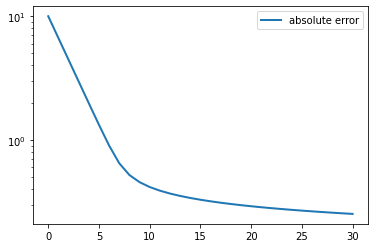

In [4]:
# Apply compare method
compare(
    N = 30, 
    tau = 1.1, 
    F = lambda x: x**3,
    b = 0.0,
    dF = lambda x: 3*x**2,
    x_0 = 10.0, 
    x_s = 0.0)

In [5]:
# N     - Iterations
# taus  - Levenberg-Marquardt dumping factors array
# F, b  - Data for objective Function L(x)=(F(x)-b)^2
# dF    - First derivative of F
# x_0   - Initial Point
# x_s   - Optimal point of L(x)=(F(x)-b)^2

In [6]:
def heuristic(N, taus, F, b, dF, x_0, x_s):
    dL = lambda x: 2*dF(x)*(F(x)-b)

    # Heuristic Method
    x = np.zeros(N+1)
    x[0] = x_0
    
    i = 0
    l = int(np.floor(len(taus)/2))
    last_f = np.inf
    
    while i < N:
        tau = taus[l]
        new_x = x[i] - 0.5*dL(x[i])/(tau+dF(x[i])**2)
        new_f = F(new_x)
        
        if last_f >= new_f:
            last_f = new_f
            x[i+1] = new_x
            l = np.max([l - 1, 0])
            i = i + 1
        elif l < len(taus)-1:
            l = l + 1
        else:
            x = x[0:i+1]
            break
    
    plt.yscale("log")
    plt.plot([abs(x[_]-x_s) for _ in range(N+1)], label="absolute error")
    plt.legend()

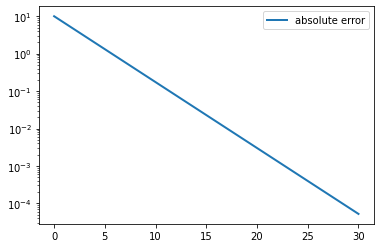

In [7]:
# Apply compare method
heuristic(
    N = 30, 
    taus = [0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7], 
    F = lambda x: x**3,
    b = 0.0,
    dF = lambda x: 3*x**2,
    x_0 = 10.0, 
    x_s = 0.0)